# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from matplotlib.colors import ListedColormap
import scipy
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing fiels
df_netflix = pd.read_csv(r'C:\Users\iNDIA\Desktop\Kaggle\Netflix Films and Tv Shows\netflix_titles.csv')

In [3]:
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df_netflix.shape

(8807, 12)

In [5]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Data Wrangling

In [6]:
#Dropping Column - All column seems important for the study, we wont be dropping any columns at the moment

## Visualizing missing Data

<AxesSubplot:>

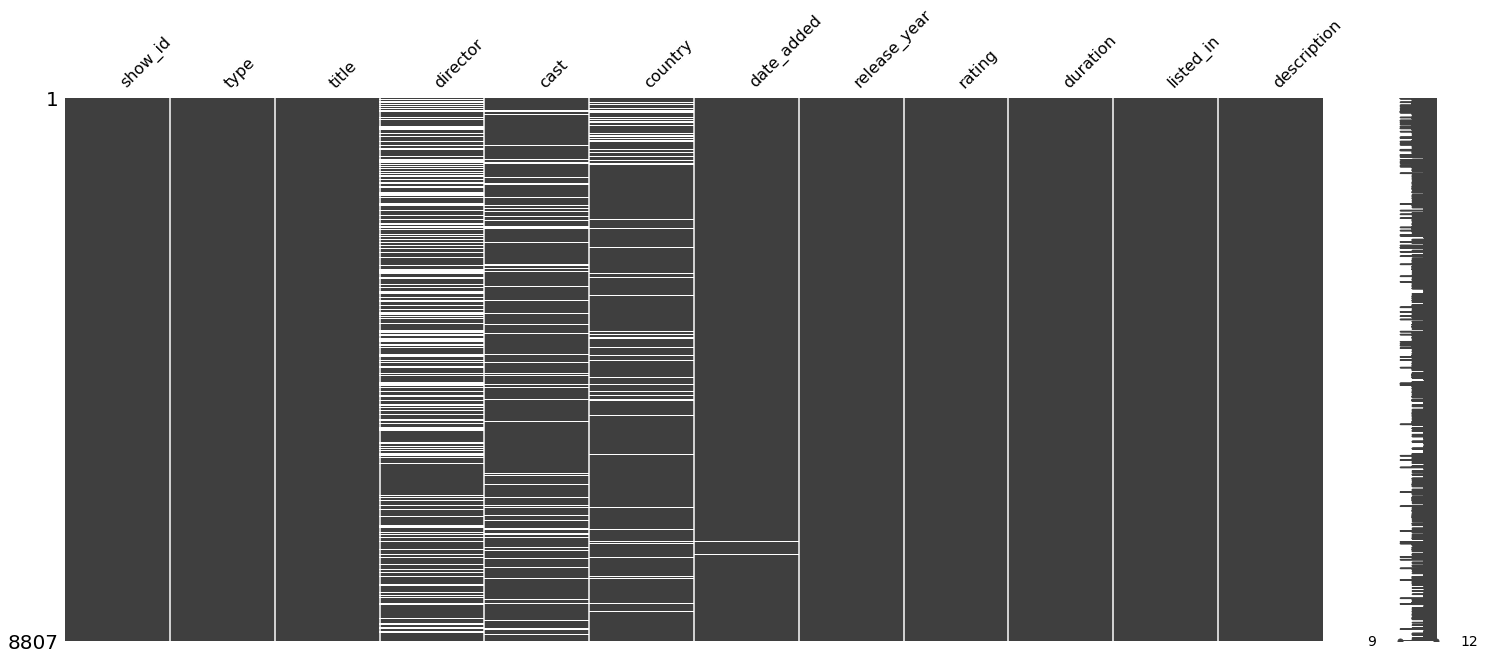

In [7]:
#Visualizing missing value as matrix
msno.matrix(df_netflix)

With the help of this matrix we can see the missing values in different columns like director, cast and country. Although cast and country have a pattern of missing data

<AxesSubplot:>

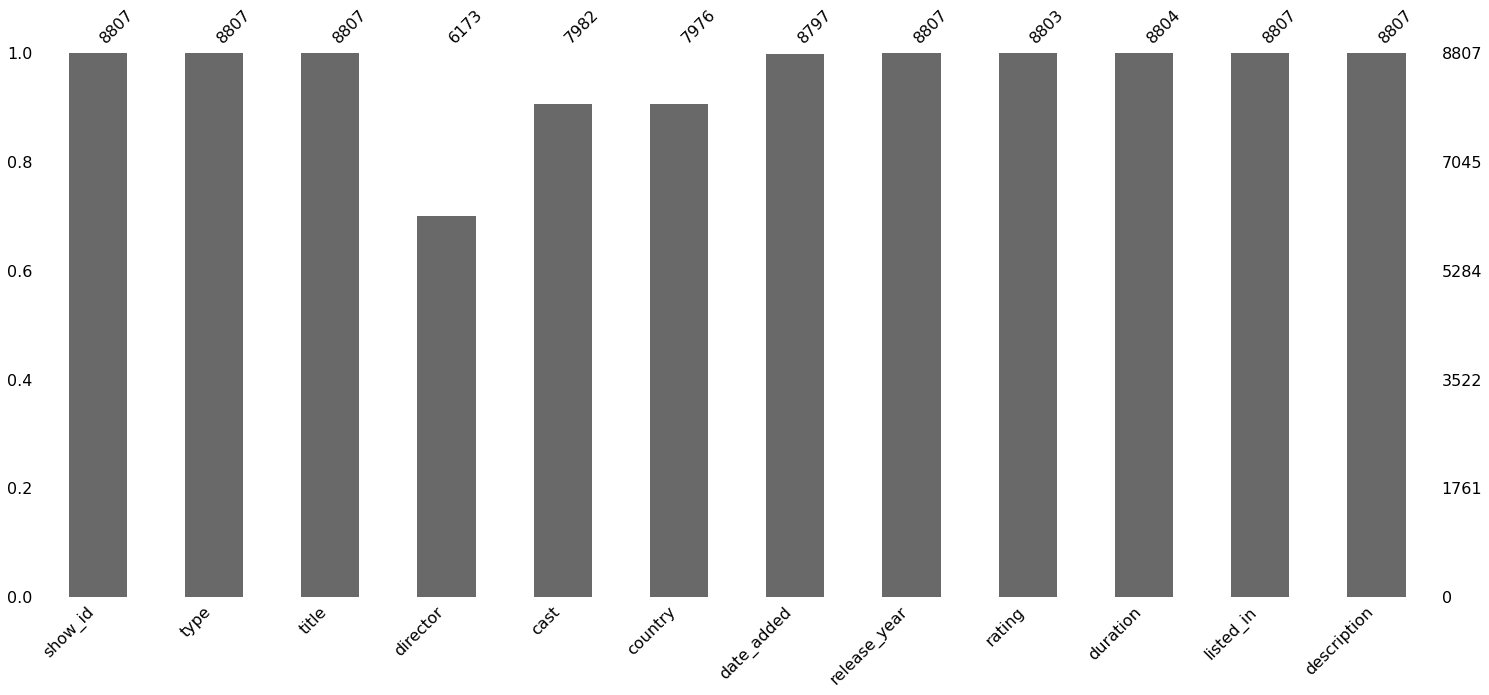

In [8]:
# Visualizing missing data as bar chart
msno.bar(df_netflix)

We can see the number of missing data in director, cast and country. Though with the help of this bar chart we found out that there is some amount of missing data in date_added and rating as well

<AxesSubplot:>

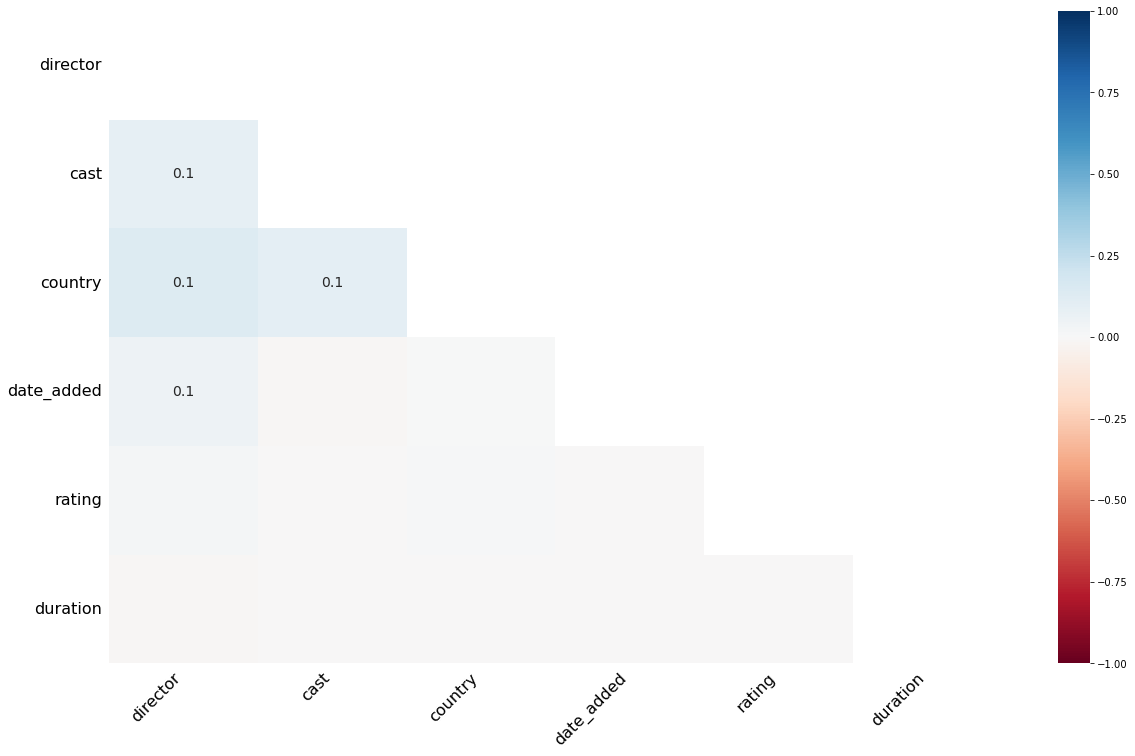

In [9]:
# Visulaizing chart as heatmap
msno.heatmap(df_netflix)

In [10]:
# Checking missing values

df_netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
# Calculating missing percent
missing_percent = round(df_netflix.isnull().mean() *100, 1)

pd.DataFrame(missing_percent[missing_percent > 0], columns = ['% of missing values'])

,% of missing values
director,29.9
cast,9.4
country,9.4
date_added,0.1


All of these columns are important for our study, hence we won't be removing any of the data. We would rename this missing data to "no data"

In [12]:
# Replacing missing data with "no data"

df_netflix['director'].replace(np.nan, 'No Data', inplace = True)
df_netflix['cast'].replace(np.nan, 'No Data', inplace = True)

#replacing country with mode data
df_netflix['country'] = df_netflix['country'].fillna(df_netflix['country'].mode()[0])

# Drops

df_netflix.dropna(inplace=True)

# Drop Duplicates

df_netflix.drop_duplicates(inplace= True)


In [13]:
df_netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [14]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [15]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [16]:
#Target based on rating
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df_netflix['target_ages'] = df_netflix['rating'].replace(ratings_ages)
df_netflix['target_ages'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids'], dtype=object)

In [17]:
# Preprocessing Data Further
#changing dtype

df_netflix['date_added'] = pd.to_datetime(df_netflix['date_added'])  #converted date_added to datetime
df_netflix['type'] = pd.Categorical(df_netflix['type'])
df_netflix['target_ages'] = pd.Categorical(df_netflix['target_ages'], categories = ['Kids', 'Older Kids', 'Teens', 'Adults'])

#breaking date_added to 'months' & 'years' for more analysis

df_netflix['month_added'] = df_netflix['date_added'].dt.month_name()
df_netflix['year_added'] = df_netflix['date_added'].dt.year

df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Adults,September,2021
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Adults,September,2021
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults,September,2021


#### Since some content have 1 or more countries, we will be making a "main_country" column for ease of calculation

In [18]:
# Separating just the first country
df_netflix['main_country'] = df_netflix['country'].apply(lambda x: x.split(",")[0])
df_netflix['main_country'].head()

0    United States
1     South Africa
2    United States
3    United States
4            India
Name: main_country, dtype: object

In [19]:
df_netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month_added,year_added,main_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,September,2021,United States
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults,September,2021,South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Adults,September,2021,United States
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Adults,September,2021,United States
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults,September,2021,India
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,Adults,September,2021,United States
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Older Kids,September,2021,United States
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Adults,September,2021,United States
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,Teens,September,2021,United Kingdom
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,Teens,September,2021,United States


# Analysis

#### 1. What dominates the Netflix library? Movie or TV Shows?
#### 2. Which country has the maximum content available?
#### 3. What rating of Movies or TV shows are maximum available in Netflix library?
#### 4. Which director has the maximum movies in Netflix Library?
#### 5. Movies and TV Shows added over time?
#### 6. Which year and month saw the maximum movie addition?
#### 7. Content preferred by the countries? (target age group)
#### 8. Most preferred Genre in the library?
#### 9. Movie/TV Shows Lag? In terms of Release and Availability
#### 10. Genre WordCloud

# Visualization

### Netflix Brand Palette

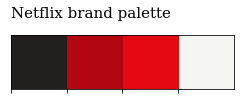

In [20]:
netflix_palette = sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])

plt.title("Netflix brand palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

We would be using this brand palette for our study

#### 1. What dominates the Netflix library? Movie or TV Shows?¶

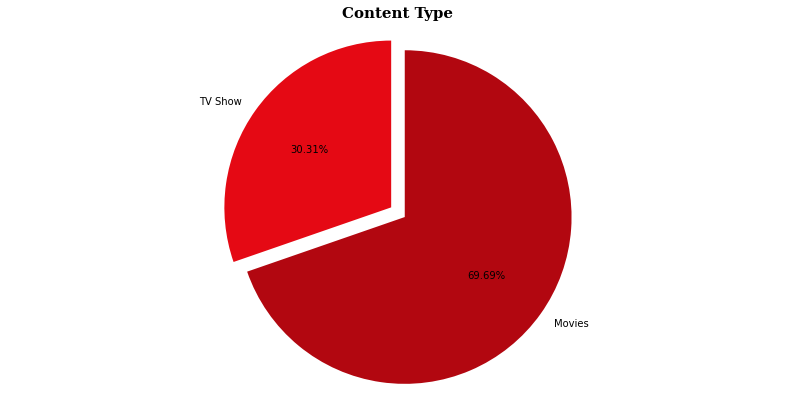

In [21]:
plt.figure(figsize = (14,7)) #size of pie chart
labels = ['TV Show', 'Movies'] #labels for the pie chart
cal = df_netflix['type'].value_counts().sort_values() #Calculation, this can be used in the main formula as well

plt.pie(cal, labels = labels, explode = [0,0.1],
       autopct = '%1.2f%%', colors = ['#e50914', '#b20710'], startangle = 90) #main command
# We can use "textprops={'color':"w"}" to make the text labels white in color but this would change the label colors as well

plt.title('Content Type',fontfamily='serif',fontsize=15, fontweight='bold')
plt.axis('equal')
plt.show()

Movies dominate the Netflix library with more than double the content of approx. 70% as compared to the TV Series

#### 2. Content with maximum Ratings?

In [22]:
df_netflix['rating'].value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

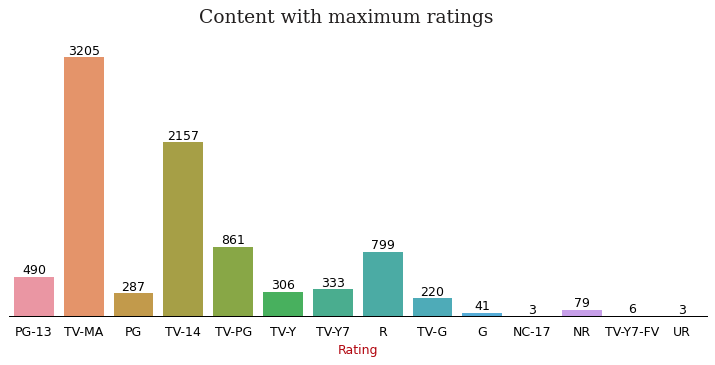

In [23]:
#BAR CHART
df_rating = df_netflix['rating'].value_counts() #calculation 
fig, ax = plt.subplots(figsize = [10,4], dpi = 90) #plot size

#modifying spines of the chart
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.tick_params(bottom = False)
ax.get_yaxis().set_visible(False)

sns.countplot(data = df_netflix, x = 'rating')

#add values on top of each bar
ax.bar_label(ax.containers[0])

ax.set_xlabel('Rating', color = '#b20710')
fig.suptitle('Content with maximum ratings', fontfamily='serif', fontsize = 15, color = '#221f1f');

TV-MA is the most preferred rating" followed by TV-14 and TV-PG

#I tried a lot to sort this in ascending order, but wasn't able to do so. Used reset_index, asecnding as well

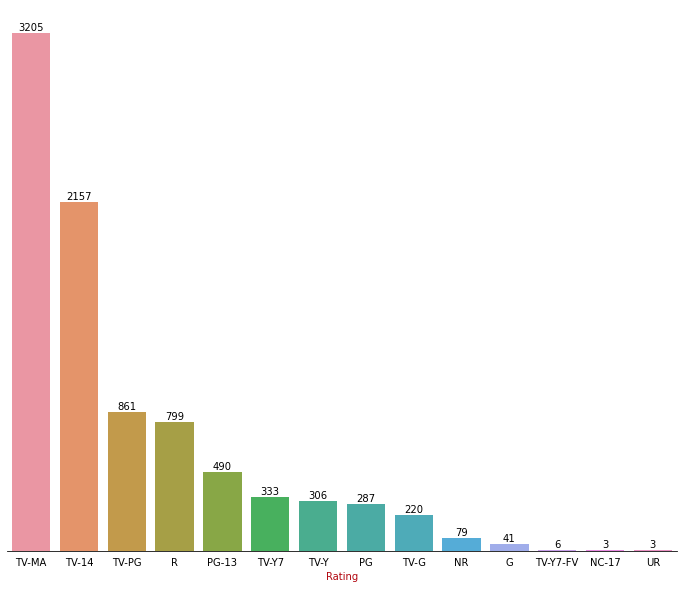

In [24]:
plt.figure(figsize=(12,10))
ax = sns.countplot(x="rating", data=df_netflix, order=df_netflix['rating'].value_counts().index[0:15])

#modifying spines of the chart
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.tick_params(bottom = False)
ax.get_yaxis().set_visible(False)


#add values on top of each bar
ax.bar_label(ax.containers[0])

ax.set_xlabel('Rating', color = '#b20710')
fig.suptitle('Content with maximum ratings', fontfamily='serif', fontsize = 15, color = '#221f1f');

#### 3. Country dominating the content?

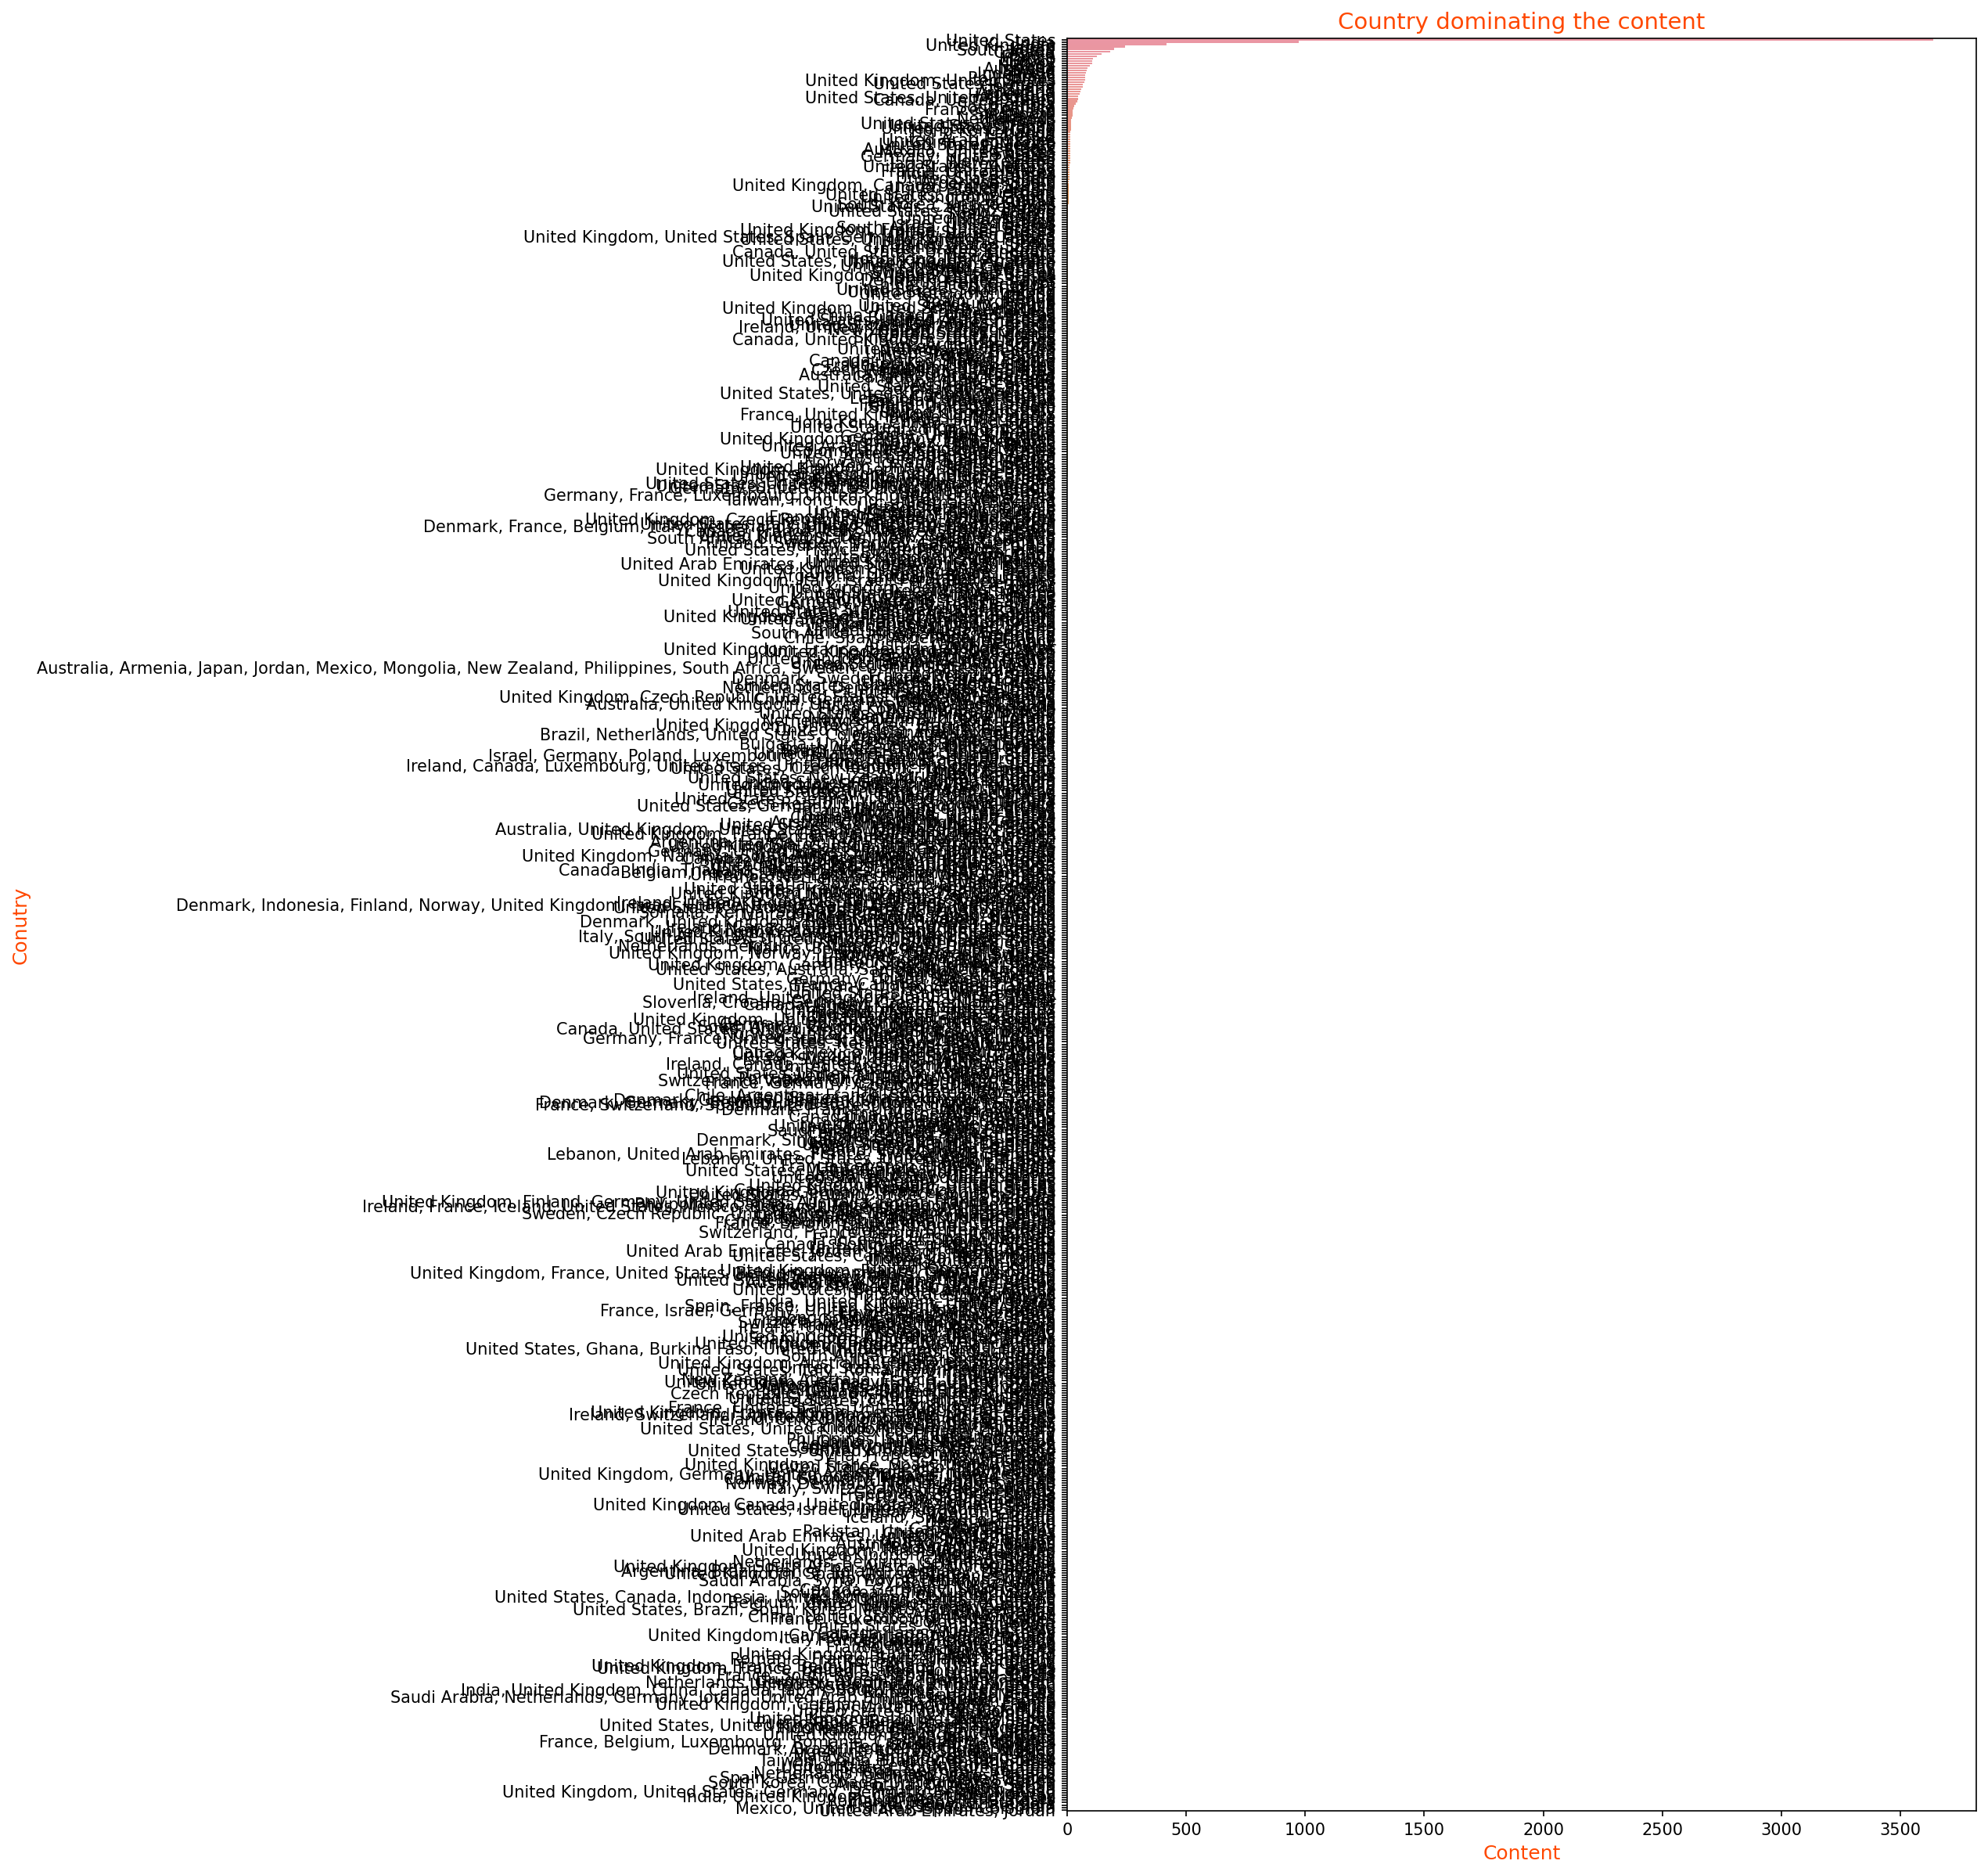

In [25]:
country_df = df_netflix['country'].value_counts()

fig, ax = plt.subplots(figsize = (10,20), dpi = 150)

sns.countplot(data = df_netflix, y = 'country', order = df_netflix.country.value_counts().index);

plt.xlabel('Content', fontsize = 12, color = '#ff4800')
plt.ylabel('Conutry', fontsize = 12, color = '#ff4800')
plt.title('Country dominating the content', fontsize = 14, color = '#ff4800');



In [27]:
# Exporting csv
df_path = r'C:\Users\iNDIA\Desktop\Kaggle\Netflix Films and Tv Shows'

In [29]:
df_netflix.to_csv(os.path.join(df_path, 'Netflix Data.csv'))